# FoodHub Data Analysis

By: **Mohit Pammu**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [89]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# renders the plot directly within the notebook
%matplotlib inline

# import and ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [90]:
# mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [91]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT - ADSP/FoodHub Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [92]:
# returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.450,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [93]:
# returns the dimensions of the DataFrame
df.shape

(1898, 9)

#### Observations:

There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [94]:
# returns the dataypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* There are 3 different datatypes: float64, int64, and object. 5 columns are numerical and 4 are object type.

* Note only 'Cost of the order' column is identified as a float type, where 'Food preparation time' and 'Delivery time' could also be identified as float but are integers.

* 'Rating' column is also identified as an object despite being on an integer scale to 5, so we can convert this to numeric.

* 'Day of the Week' column is object type and only labeled as being either Weekend or Weekday.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [95]:
# returns total count of missing/ null values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [96]:
# returns total count of missing/ NaN values
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

There are no missing values in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [97]:
# returns a statistical summary of all the data and transposes the columns for readability
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:

* The minimum food preparation time is 20 min.

* The average food preparation time is approx. 27.372 min.

* The maximum food preparation time is 35 min.

### **Question 5:** How many orders are not rated?

In [98]:
# returns a count of all unique values in the 'Rating' column
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [99]:
# filters a list from the 'Rating' column with values that are labeled 'Not given' and returns a total count
df['rating'][df['rating'] == 'Not given'].count()

736

#### Observations:

There are 736 orders that have not been rated, labeled "Not given". This is roughly 38.78% of the total rows. Notably there are no "0", "1", or "2" rated orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

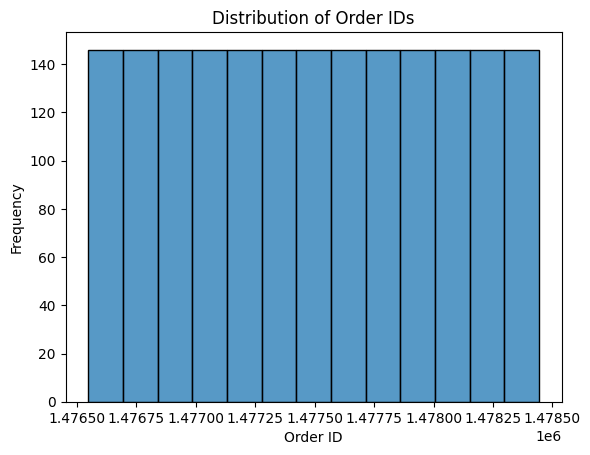

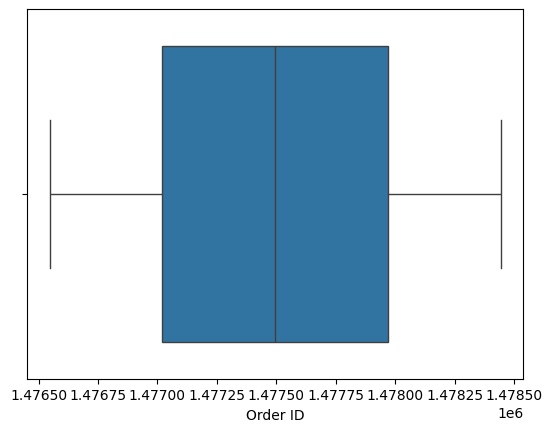

In [100]:
# plot a histogram for the distribution of the 'Order ID' column
sns.histplot(data=df, x='order_id')
plt.xlabel('Order ID') #labels the x axis
plt.ylabel('Frequency') #labels the y axis
plt.title('Distribution of Order IDs') #gives the graph a title
plt.show() #displays the graph

# plot a boxplot for the distribution of the 'Order ID' column
sns.boxplot(data=df, x='order_id')
plt.xlabel('Order ID')
plt.show()

#### Observations:

Both the histogram and boxplot are uniformly distibuted. This is because there is only one instance of each individual order, there are no repeat order IDs that are created or reused. So plotting the distribution of this feature isn't particularly useful.

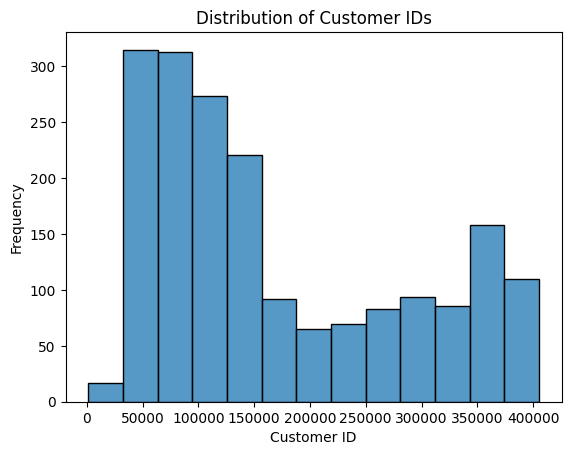

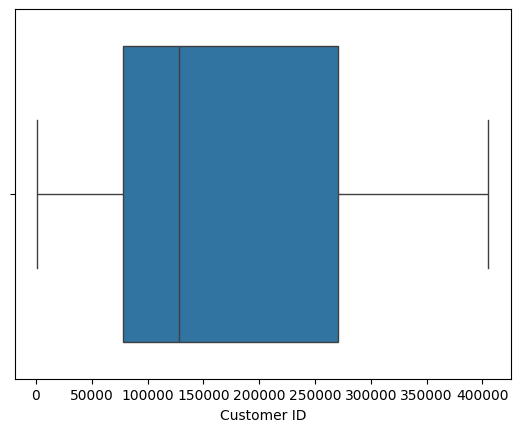

In [101]:
# plot a histogram for the distribution of the 'Customer ID' column
sns.histplot(data=df, x='customer_id')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title('Distribution of Customer IDs')
plt.show()

# plot a boxplot for the distribution of the 'Customer ID' column
sns.boxplot(data=df, x='customer_id')
plt.xlabel('Customer ID')
plt.show()

#### Observations:

* Slightly skewed right with the highest number of orders being placed from customer ID's starting with 50000 to 150000.

* The median is close to the 125000 mark and the IQR is between roughly 70000 and 270000.

* There is another smaller peak around the 350000 Customer ID range so could be considered bimodal.


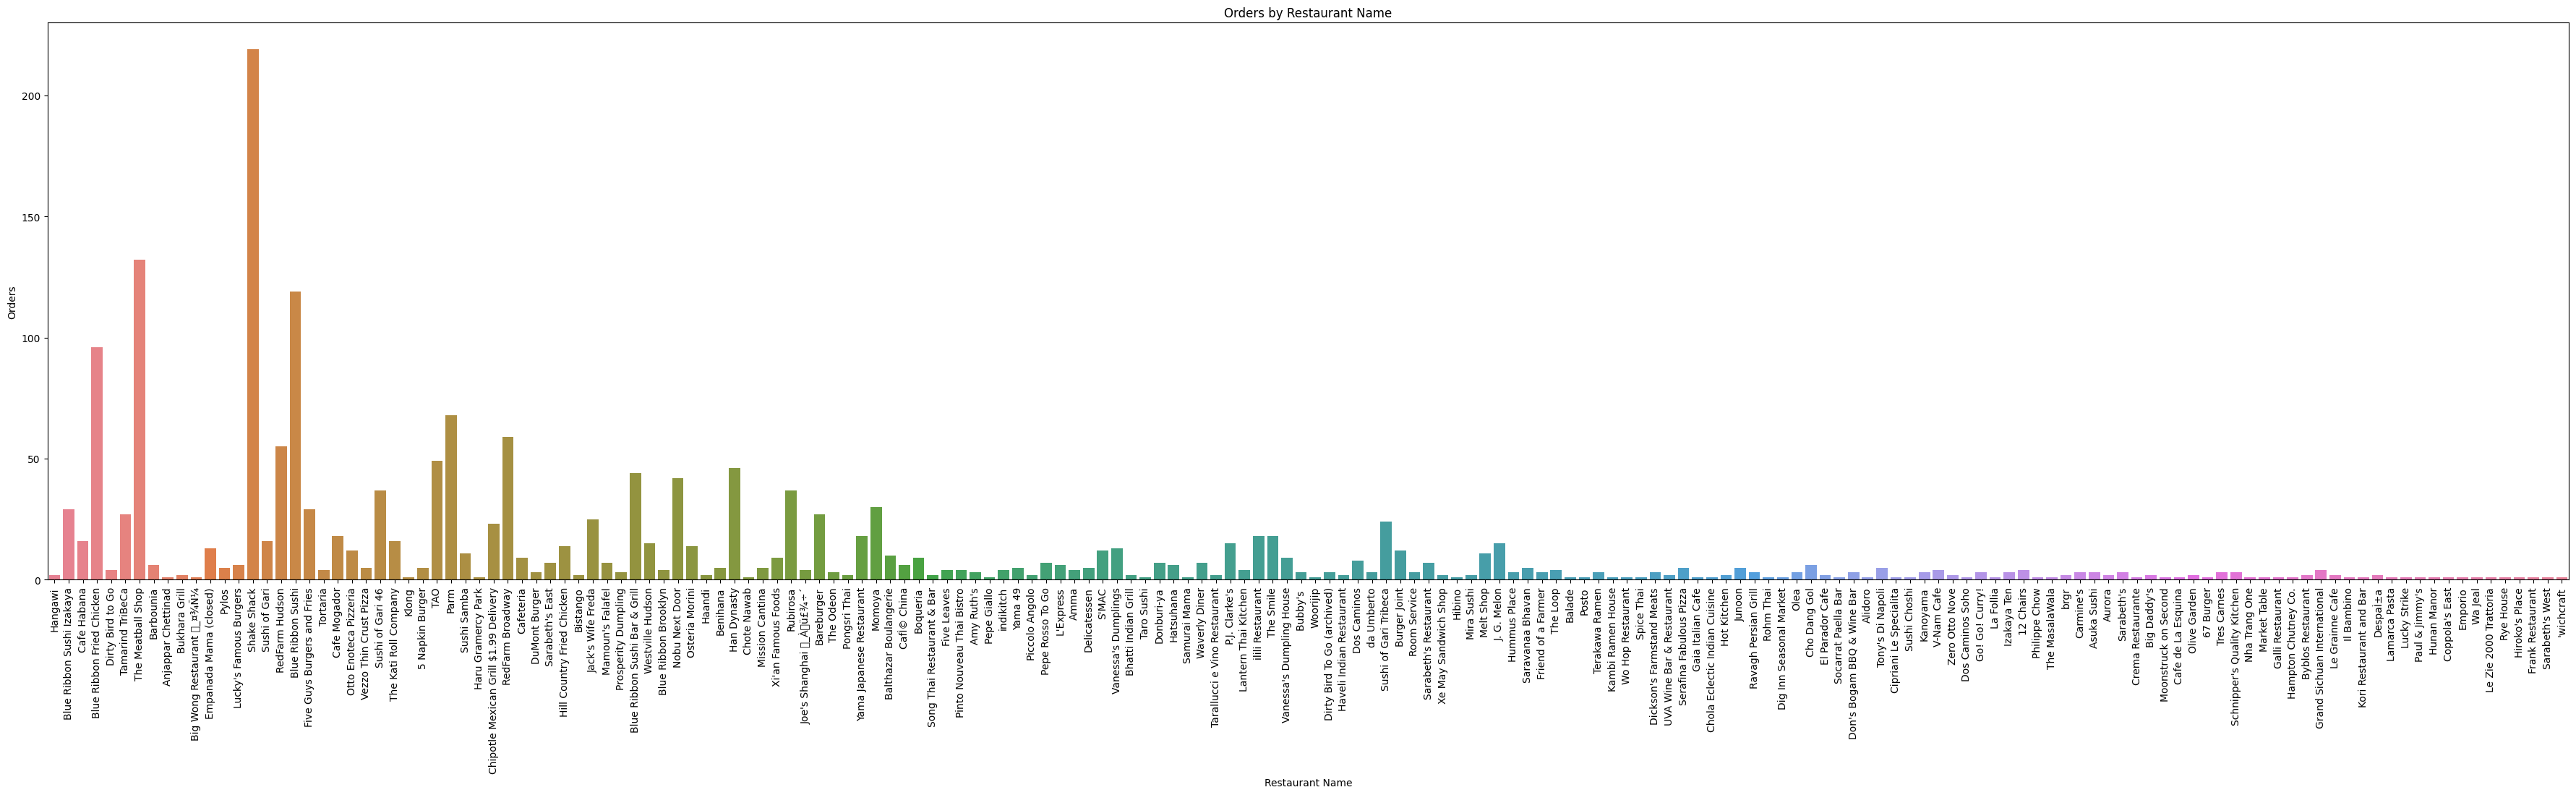

In [102]:
# plot a bar graph to show counts of each bin of categorical variable(restaurant name)
plt.figure(figsize=(45,10)) #sets graph size
sns.countplot(data=df, x='restaurant_name', hue='restaurant_name')
plt.title('Orders by Restaurant Name')
plt.xlabel('Restaurant Name')
plt.ylabel('Orders')
plt.xticks(rotation=90) #rotates x axis lables 90 degrees
plt.show()

#### Observations:

We can see that Shake Shack is by far the most ordered from restaurant with well over 200 orders. The second most ordered from restaurant is The Meatball Shop, third Blue Ribbon Sushi, fourth Blue Ribbon Fried Chicken, and fifth is Parm.

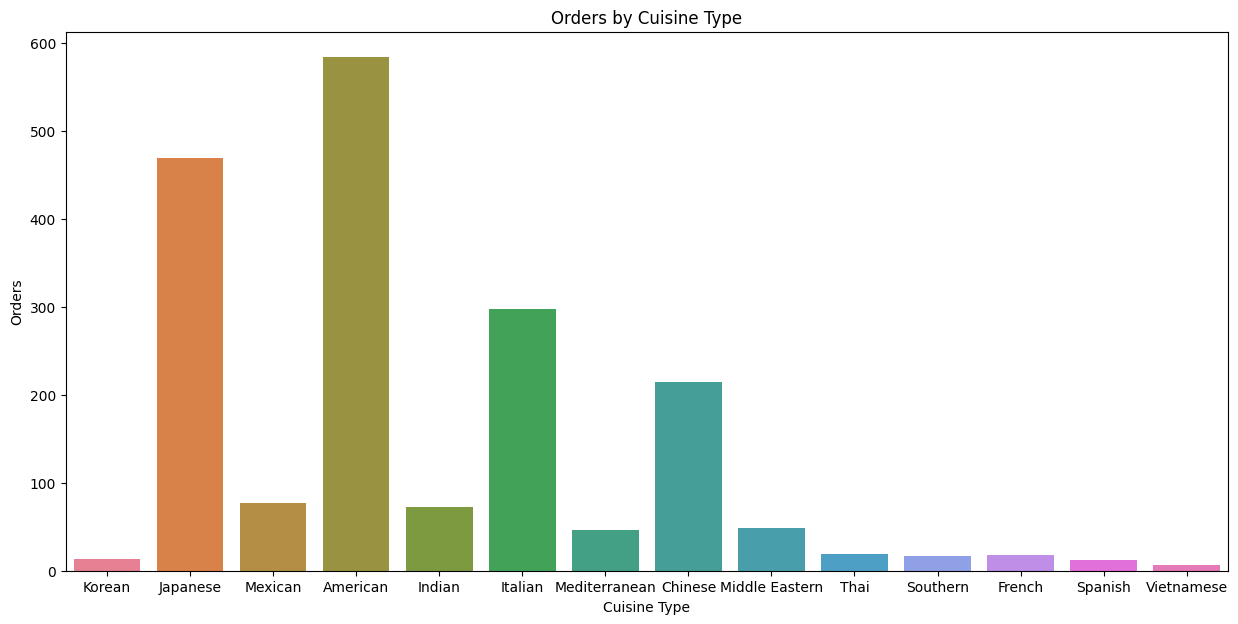

In [103]:
# plot a bar graph to show counts of orders by cuisine type
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='cuisine_type', hue='cuisine_type')
plt.title('Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Orders')
plt.show()

#### Observations:

* American is the most ordered cuisine with Japanese as a close second. Third most ordered cuisine is Italian and fourth is Chinese.
* This makes sense because the proportion of restaurants labeled as American is significantly more at about ~31% (as seen by the line of code below).

In [104]:
# calculates proportion of restaurants grouped by cuisine types into percentages
df['cuisine_type'].value_counts(normalize=True)*100

,proportion
cuisine_type,
American,30.769
Japanese,24.763
Italian,15.701
Chinese,11.328
Mexican,4.057
Indian,3.846
Middle Eastern,2.582
Mediterranean,2.424
Thai,1.001


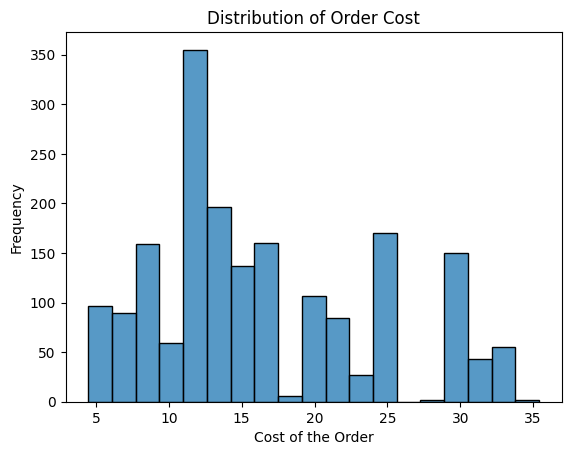

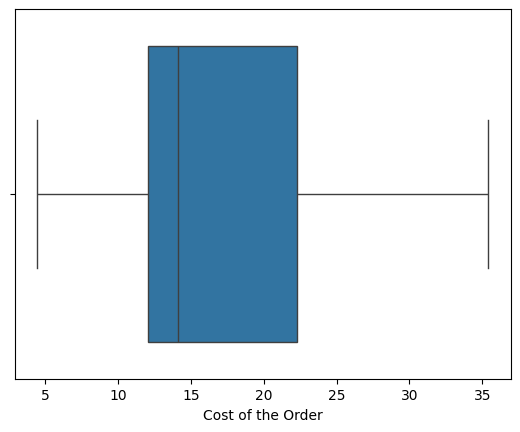

In [105]:
# plot a histogram of the distribution of the 'Cost of the Order' column
sns.histplot(data=df, x='cost_of_the_order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.title('Distribution of Order Cost')
plt.show()

# plot a boxplot of the distribution of the 'Cost of the Order' column
sns.boxplot(data=df, x='cost_of_the_order')
plt.xlabel('Cost of the Order')
plt.show()

#### Observations:

* Slightly right skewed with the highest amount of orders costing between `$10` and `$15`.  

* Median price is close to $15.  

* IQR is between about `$12`  and  `$23`.  

* Lowest costing order is slightly less than `$5` and highest costing order is slightly over `$35`.

* There are no outliers.  

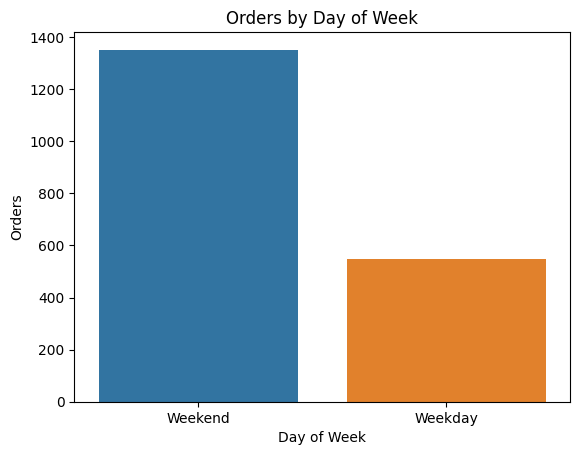

In [106]:
# plot a bar graph to show counts of orders by day of week
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week')
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Orders')
plt.show()

#### Observations:

* Column is broken into two labels: Weekend and Weekday. Individual days are not accounted for.

* Significantly more orders are placed on the weekend compared to the weekday, more than double the amount close to 1300.

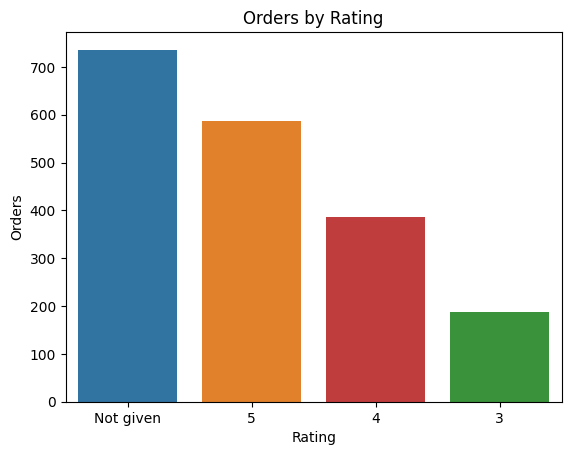

In [107]:
# plot a bar graph of orders by Rating
sns.countplot(data=df, x='rating', hue='rating', order=df['rating'].value_counts().index)
plt.title('Orders by Rating')
plt.xlabel('Rating')
plt.ylabel('Orders')
plt.show()

#### Observations:

* 'Not given' is the most recorded rating with over 700 orders.

* '5' is the second most recorded rating with a little under 600 orders.

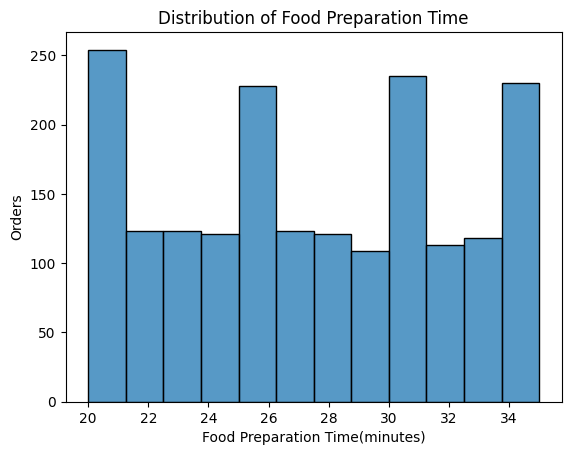

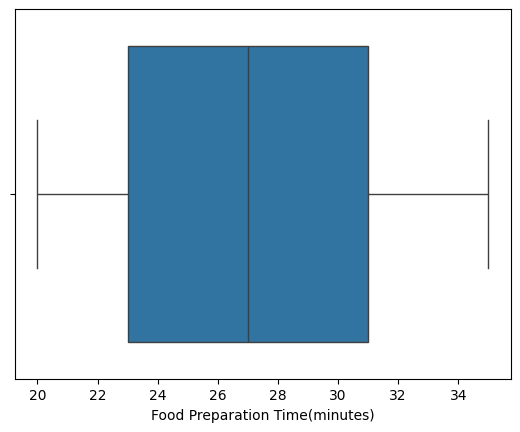

In [108]:
# plot a histogram of the distribution of the 'Food Preparation Time' column
sns.histplot(data=df, x='food_preparation_time')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time(minutes)')
plt.ylabel('Orders')
plt.show()

# plot a boxplot of the distribution of the 'Food Preparation Time' column
sns.boxplot(data=df, x='food_preparation_time')
plt.xlabel('Food Preparation Time(minutes)')
plt.show()

#### Observations:

* Both plots are fairly evenly distributed and symmetrical.

* The histogram is multimodal with four separate peaks around the 20 min., 25 min., 30 min., and 35 min. marks so most orders are ready around these times.

* The highest frequency is around the 20 min. mark, which is also the lowest preparation time.

* The median preparation time is approx. 27 min.

* IQR is between 23 min. and 31 min.

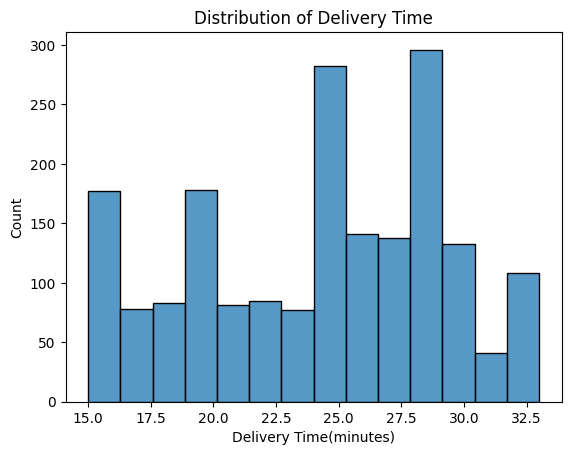

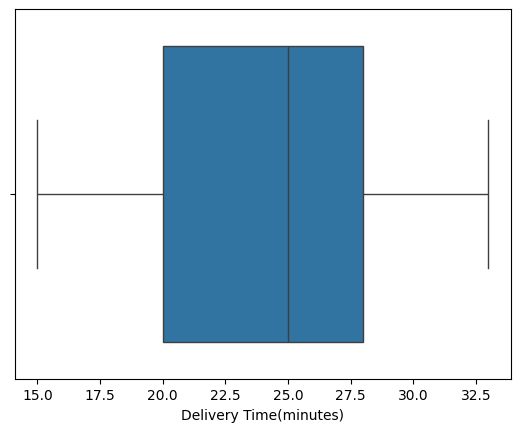

In [109]:
# plot a histogram of the distribution of the 'Delivery Time' column
sns.histplot(data=df, x='delivery_time')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time(minutes)')
plt.ylabel('Count')
plt.show()

# plot a boxplot of the distribution of the 'Delivery Time' column
sns.boxplot(data=df, x='delivery_time')
plt.xlabel('Delivery Time(minutes)')
plt.show()

#### Observations:

* The histogram is slightly left skewed with the highest frequency of deliveries occurring around the 28 min. mark, however there are multiple peaks.

* The second highest occurring delivery time is around 25 min., which is also the median of the data.

* IQR is between 20 min. and 28 min.

* Longest delivery time is about 33 min. and the fastest(lowest) is 15 min.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [110]:
# returns top 5 restaurants by order received
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

The top 5 restaurants by number of orders are:

* 1) Shake Shack(219)  
* 2) The Meatball Shop(132)  
* 3) Blue Ribbon Sushi(119)  
* 4) Blue Ribbon Fried Chicken(96)  
* 5) Parm(68)

There is a significant dropoff in number of orders from Shack Shack to The Meatball Shop(a difference of 87 orders). That is more than the total number of orders received by Parm.

### **Question 8**: Which is the most popular cuisine on weekends?

In [111]:
# returns Cuisine Type grouped by Day of the Week in descending order
df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

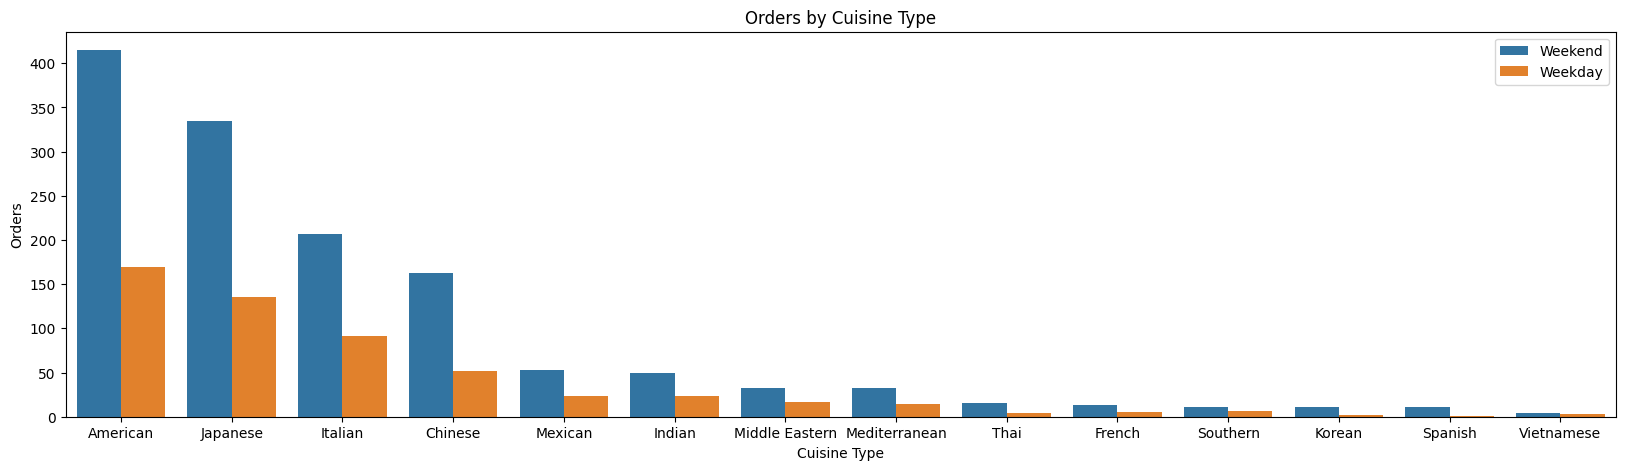

In [112]:
# plot a bar graph of orders by Cuisine Type, separate by day of week
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', order=df['cuisine_type'].value_counts().index)
plt.title('Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Orders')
plt.legend(title=None) #removes legend title
plt.show()

#### Observations:

The most popular cuisine on weekends is American. Japanese is the second most popular cuisine with Italian being the third. These rankings are consistent through the weekday as well.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [113]:
# filter the DataFrame to orders costing more than $20
# divide the filtered list by the total numbers of orders and convert to percentage
df.loc[df['cost_of_the_order']>20].value_counts().sum() / df['cost_of_the_order'].value_counts().sum()*100

29.24130663856691

#### Observations:

The percentage of orders that cost more than $20 is approx. 29.24%.

### **Question 10**: What is the mean order delivery time?

In [114]:
# averages the values from the Delivery Time column
df['delivery_time'].mean()

24.161749209694417

#### Observations:

The average delivery time is approx. 24.16 min.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [115]:
# counts unique values in Customer ID column and returns the top 3
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

The top 3 customers by orders placed are:

* 1) 52832(13 orders)
* 2) 47440(10 orders)  
* 3) 83287(9 orders)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


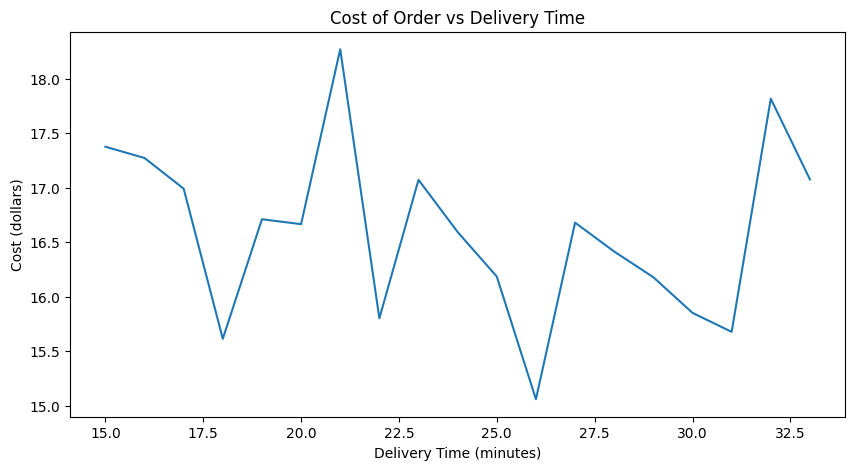

In [116]:
# plot a line graph showing the relationship between Cost of Order and Delivery Time
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='delivery_time', y='cost_of_the_order', errorbar=None)
plt.title('Cost of Order vs Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Cost (dollars)')
plt.show()

#### Observations:

As the cost of the order increases, the delivery time doesn't necessarily increase. We can see the highest point in the graph is at above `$18` and about 21 minutes. The lowest point is at `$15` but took a longer delivery time of about 26 minutes. The second highest point on the graph was at under `$18` and took the longest time to be delivered at close to 32.5 minutes. This makes sense as there isn't necessarily a correlation because delivery time is only measured from time of pick up, it does not include preparation time.

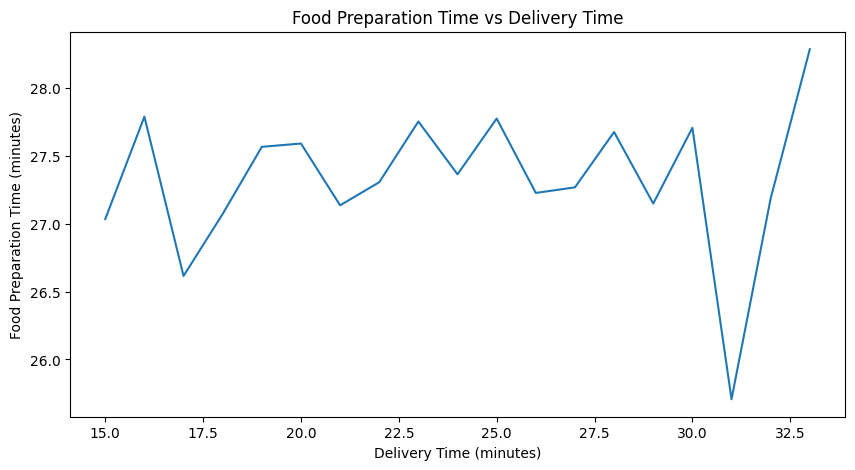

In [117]:
# plot a line graph showing the relationship between Food Preparation Time and Delivery Time
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='delivery_time', y='food_preparation_time', errorbar=None)
plt.title('Food Preparation Time vs Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

#### Observations:

There doesn't seem to be a significant positive correlation between Food Preparation Time and Delivery Time. The line is relatively flat until the end of the graph where there is the sharpet dip followed by the steepest rise. So despite it being the shortest food prep time, it was close to the longest delivery time. This makes sense again as both are measured independently.

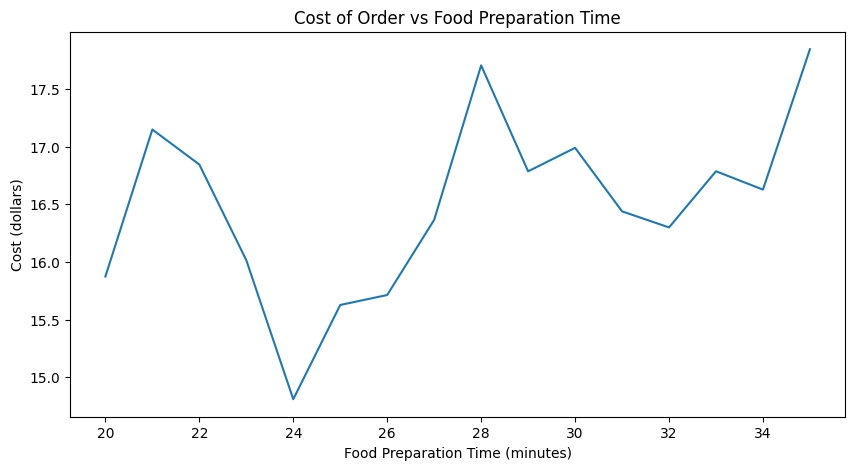

In [118]:
# plot a line graph showing the relationship between Cost of Order and Food Preparation Time
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='food_preparation_time', y='cost_of_the_order', errorbar=None)
plt.title('Cost of Order vs Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Cost (dollars)')
plt.show()

#### Observations:

Here we can see there is a fairly positive correlation between order cost and food prep time. This makes sense as the higher the amount of order, the longer the preparation takes.

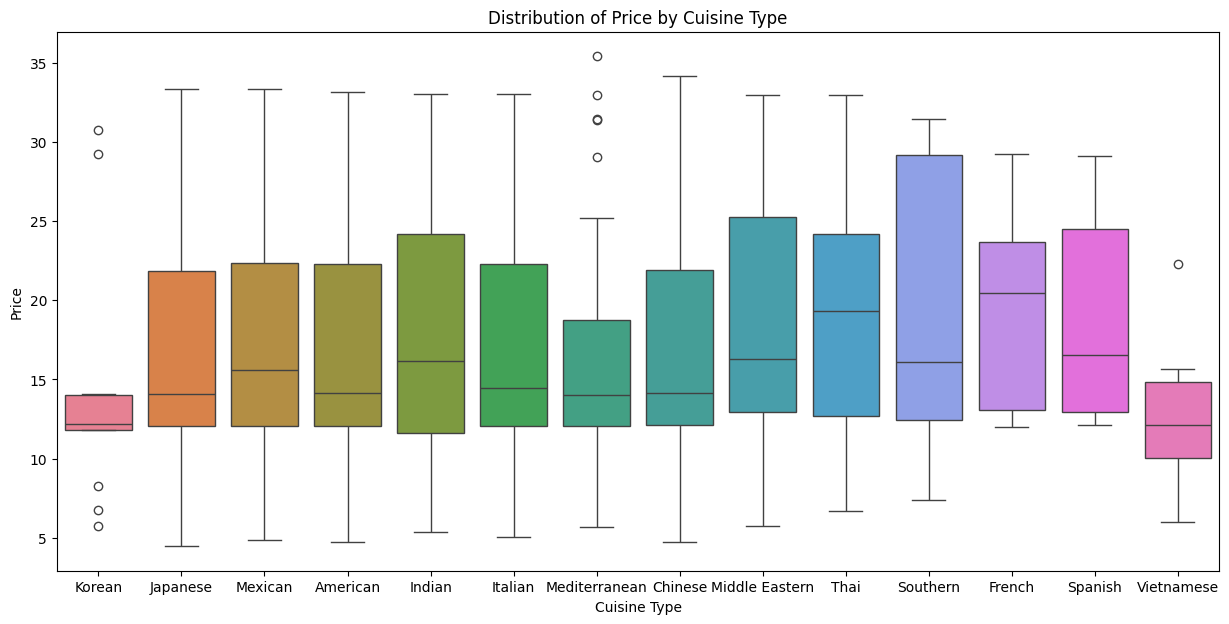

In [119]:
# plot the distributions of Price by Cuisine Type
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type')
plt.title('Distribution of Price by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Price')
plt.show()

#### Observations:

Here we can see the only cuisine types with outliers are Korean, Mediterranean, and Vietnamese. For the most part the cusinie types have similar IQRs between the `$12` and `$25` range. A majority of them also maintain a similar median price at about `$14` to `$17`. So we can say they have competitive pricing.

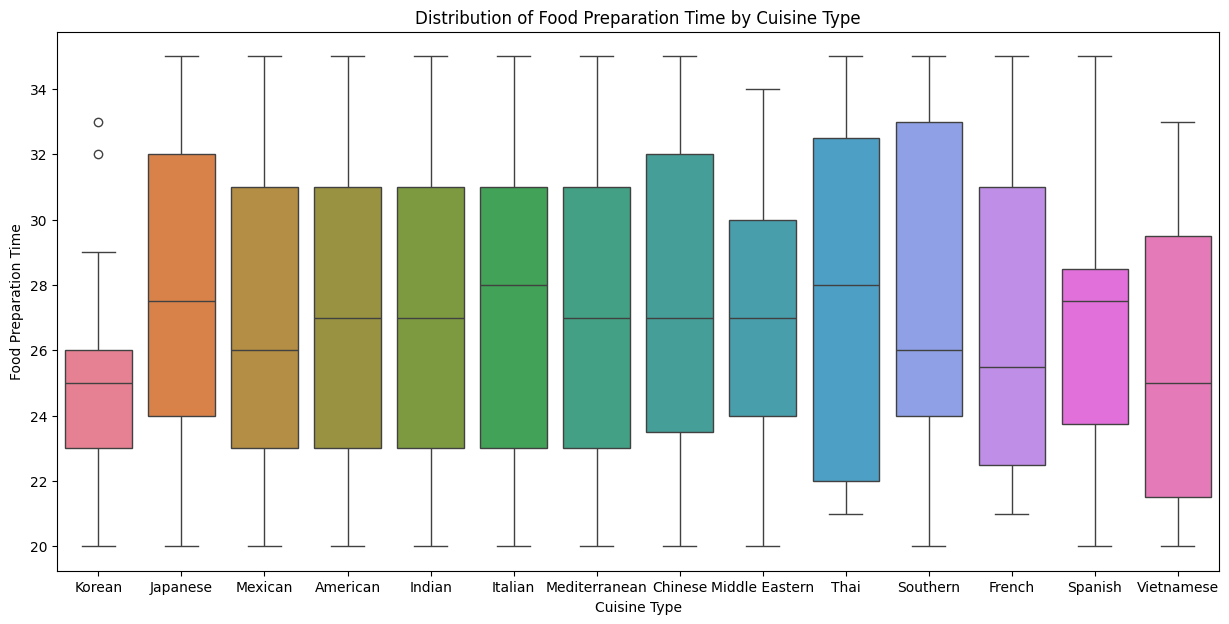

In [120]:
# plot the distributions of Food Preparation Time by Cuisine Type
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue='cuisine_type')
plt.title('Distribution of Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.show()

#### Observations:

Here we can see that Mexican, American, Indian, Italian, and Mediterranean have amlomst identical IQRs with slight deviation of their medians. A majority of the restaurants have most of their orders take at least 22 minutes to get ready. Korean cuisine is the only one with outliers.

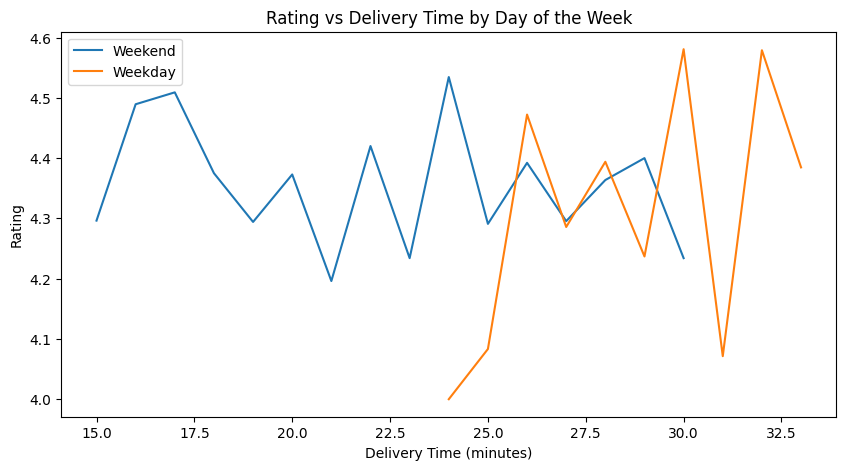

In [121]:
# convert Rating column to numeric type and replace 'Not given' values with 'NaN'
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# plot a line graph showing the relationship between Delivery Time and Rating by Day of the Week
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='delivery_time', y='rating', hue='day_of_the_week', errorbar=None)
plt.title('Rating vs Delivery Time by Day of the Week')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Rating')
plt.legend(title=None)
plt.show()

#### Observations:

Here we can can see for the weekend there is loosely a negative correlation, that is the longer the delivery time the rating gets lower. There are much sharper peaks and valleys for the weekday and almost seems like a positive trend overall as even a 30 minute delivery is getting a high rating. Then, at about 31 minutes the rating has a sharp decline at about 4.1 so we can't definitively say rating is correlated to delivery time. Also the shortest delivery time during the weekday is recorded at about 23 minutes.

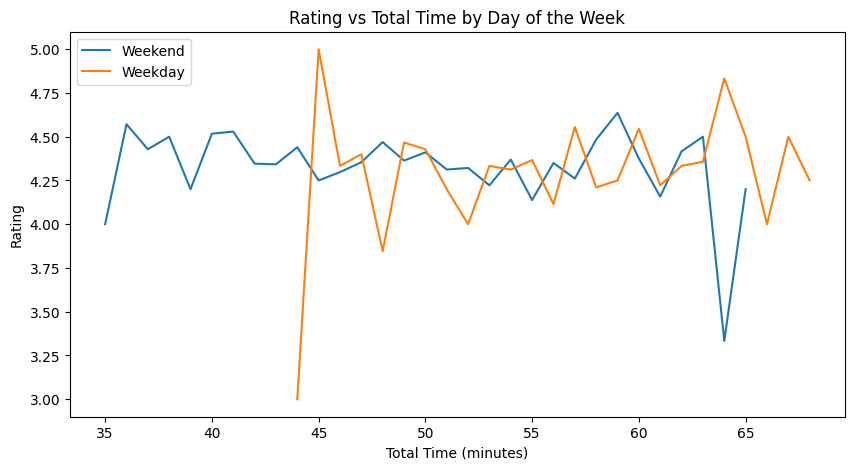

In [122]:
# create a new 'Total tTime' column by adding together 'Delivery Time' and 'Food Preparation Time'
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

# plot a line graph showing the relationship between Total Time and Rating by Day of the Week
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='total_time', y='rating', hue='day_of_the_week', errorbar=None)
plt.title('Rating vs Total Time by Day of the Week')
plt.xlabel('Total Time (minutes)')
plt.ylabel('Rating')
plt.legend(title=None)
plt.show()

#### Observations:

Here we were trying to see if by adding both Food Preparation Time and Delivery Time together if that would have an affect on Rating. We can see that for both weekend and weekday the lines are relatively flat and don't really trend positive or negative so we can conclude Rating is more influenced by other factors than time.

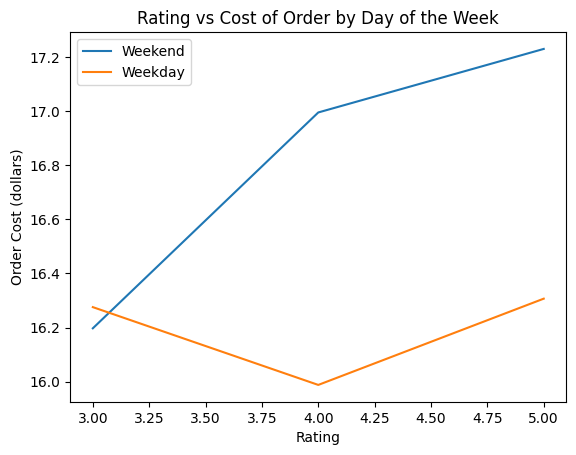

In [123]:
# plot a line graph showing the relationship between Rating and Cost by Day of the Week
sns.lineplot(data=df, x='rating', y='cost_of_the_order', hue='day_of_the_week', errorbar=None)
plt.title('Rating vs Cost of Order by Day of the Week')
plt.xlabel('Rating')
plt.ylabel('Order Cost (dollars)')
plt.legend(title=None)
plt.show()

#### Observations:

For the weekend, there is a strong positive trend, as the price of the order increases so does the rating. For the weekend there is a negative trend, as the price drops the rating increases to 4 where it becomes positive as prices increase so do ratings. This is interesting as customers are satisfied with the prices they've paid.

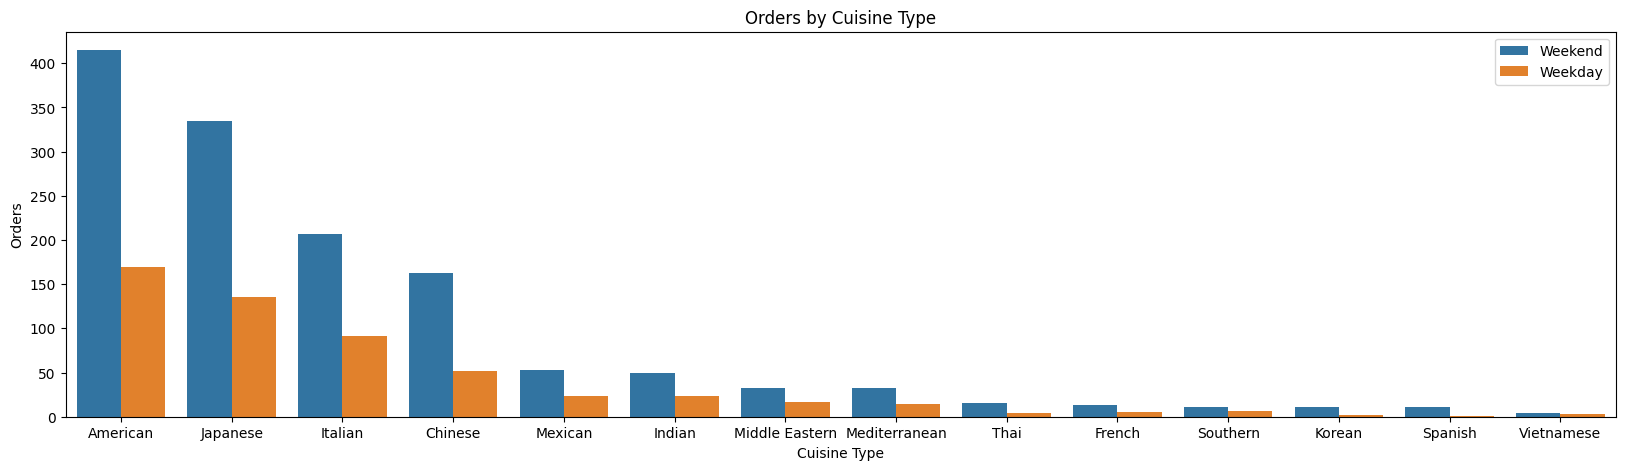

In [124]:
# plot a bar graph of orders by Cuisine Type, separate by day of week
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', order=df['cuisine_type'].value_counts().index)
plt.title('Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Orders')
plt.legend(title=None)
plt.show()

#### Observations:

* American cuisine is the most ordered food on the weekend and weekday. The rankings are consistent for the weekend and the weekday.

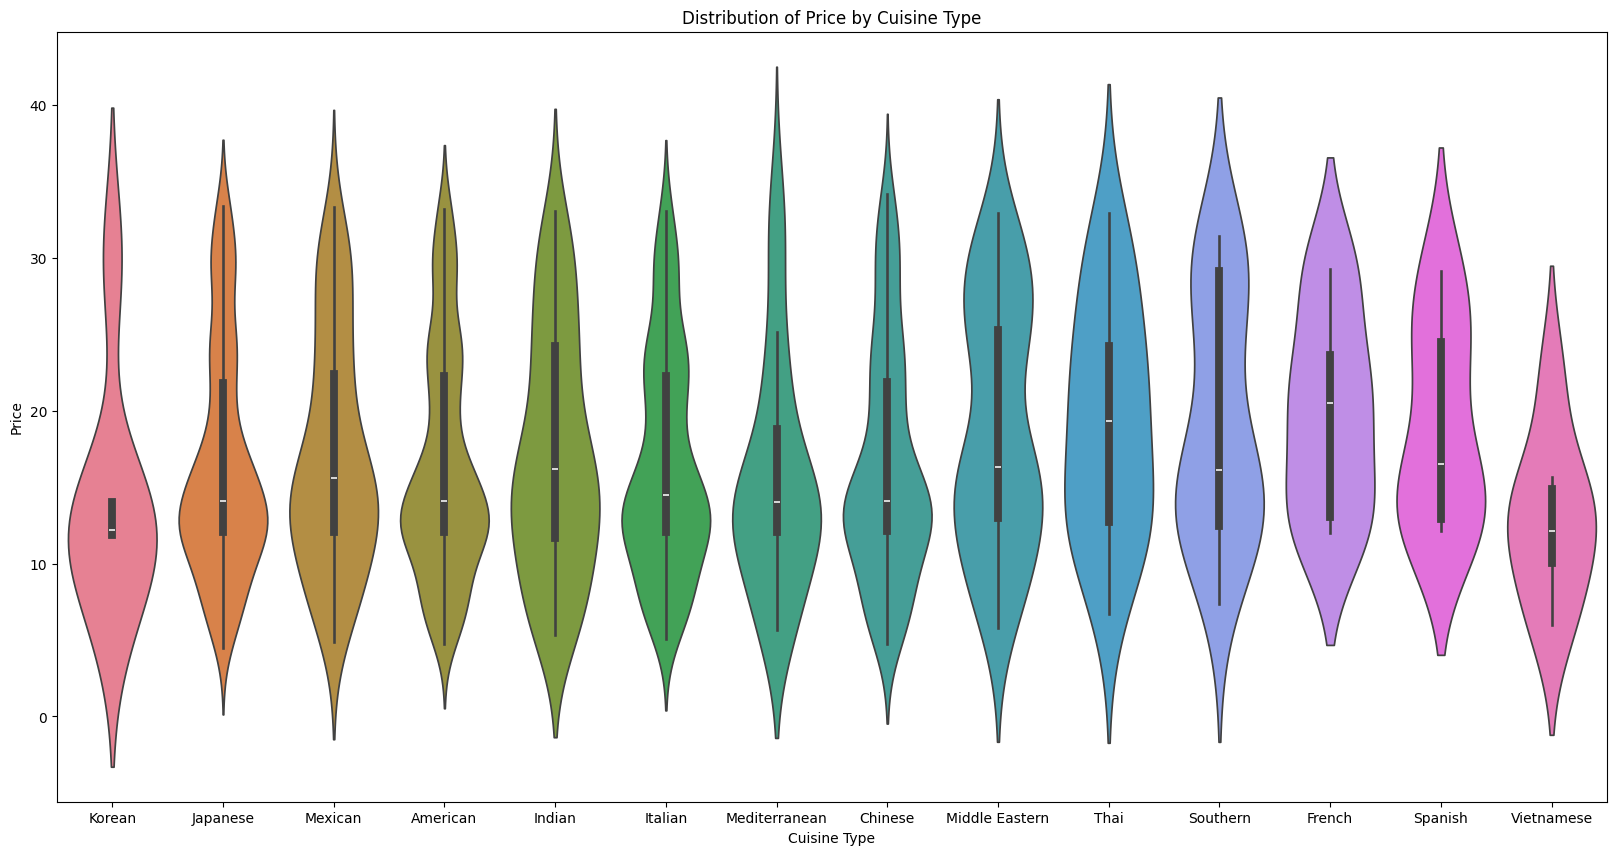

In [125]:
# plot a violon plot to show the density and distribution of Price by Cuisine Type
plt.figure(figsize=(20,10))
sns.violinplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type')
plt.title('Distribution of Price by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Price')
plt.show()

#### Observations:

This graph is consistent with earlier boxplot. However this shows the density of values, that is where is the concentration of values located. We can see the majority of occurrences are between `$10` and `$20`. The median is mostly between this range as well. They also seem to have a positive skew as the majority of values are towards the lower end of price and a few values at the top of the range causing the tail to stretch.

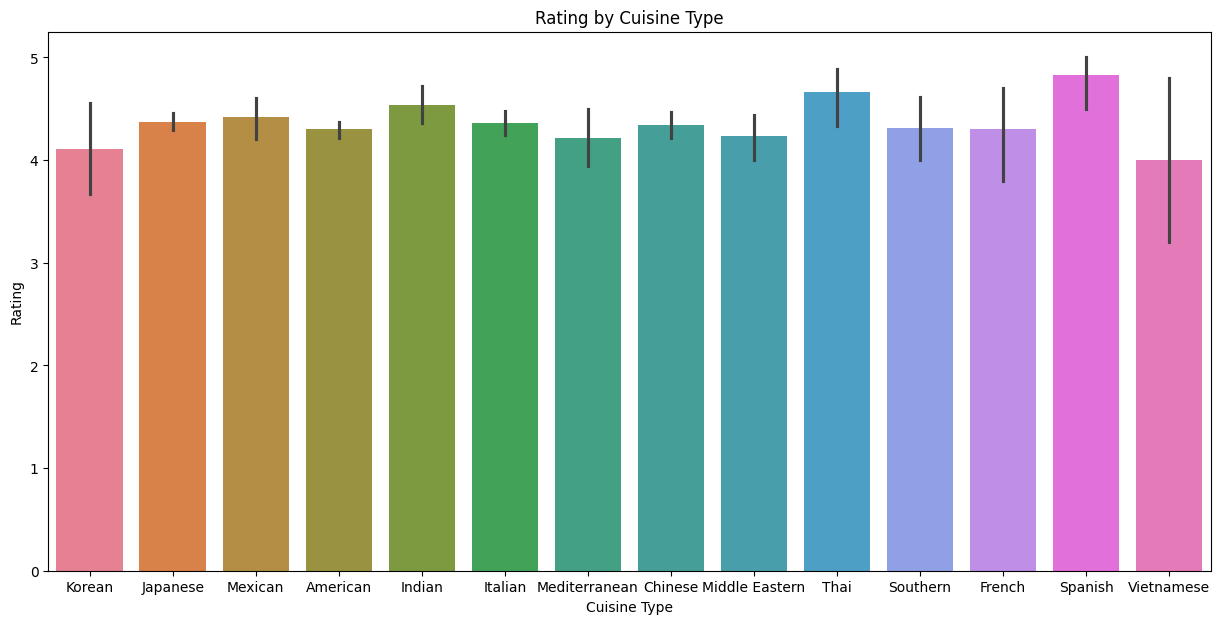

In [126]:
# plot a bar graph of Ratings by Cuisine Type
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='cuisine_type', y='rating', hue='cuisine_type')
plt.title('Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.show()

#### Observations:

We can see that Korean and Vietnamese cuisine types have the most standard deviation from their average rating. American cuisine has the lowest standard deviation meaning that rating is accurate/ consistent accross orders. Spanish cusine has the highest average rating. We can see based on the data, all of the cuisine types maintain a minimum 4 rating.

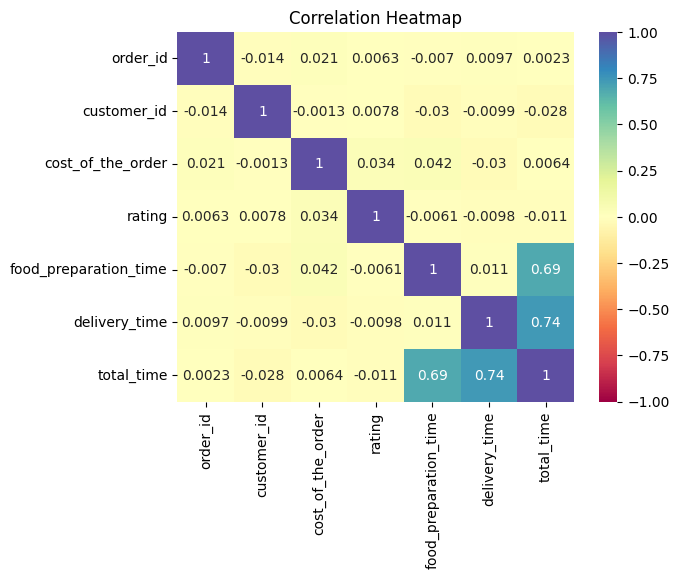

In [127]:
# plot a heatmap of numerical columns to see correlation
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True, cmap='Spectral',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### Observations:

The only notable strong correlations are between columns that were used to create a new column. Net revenue has almost a 1 correlation to cost of the order because that column was used to calculate net revenue. Similarly, food preparation time and delivery time were both used to calculate total time so they also have a strong correlation. Otherwise the other features are not noticeably correlated as we've seen from the exploratory data analysis we've conducted.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [128]:
# convert Rating column to numeric type and replace 'Not given' values with 'NaN'
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# calculate number of ratings each restaurant received and assign it to a variable
rating_counts = df['restaurant_name'].value_counts()

# calculate the average rating for each restaurant
restaurant_ratings = df.groupby('restaurant_name')['rating'].mean(numeric_only=True)

# filter 'restaurant_ratings' variable to restaurants with more than 50 ratings
filtered_restaurants = restaurant_ratings[rating_counts > 50]

# filter 'filtered_restaurants' variable to restaurants with an average rating higher than 4
promotional_restaurants = filtered_restaurants[filtered_restaurants > 4]

print(promotional_restaurants)

restaurant_name
Blue Ribbon Fried Chicken   4.328
Blue Ribbon Sushi           4.219
Parm                        4.128
RedFarm Broadway            4.244
RedFarm Hudson              4.176
Shake Shack                 4.278
The Meatball Shop           4.512
Name: rating, dtype: float64


#### Observations:

The restaurants that satisfy the criteria and are eligible for the prommotion include:

* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* Parm
* RedFarm Broadway
* RedFarm Hudson
* Shake Shack
* The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [129]:
# create a 'net revenue' column initialized to float type 0.0
df['net_revenue'] = 0.0

# locate orders costing more than $20 and apply a 25% charge to the corresponding net revenue column
df.loc[df['cost_of_the_order'] > 20, 'net_revenue'] = df['cost_of_the_order'] * 0.25

# locate orders costing between $5 and $20, then apply a 15% charge to the corresponding net revenue column
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'net_revenue'] = df['cost_of_the_order'] * 0.15

# total all the input charges in the net revenue column
total_net_revenue = df['net_revenue'].sum()

print("Total net revenue generated:", total_net_revenue)


Total net revenue generated: 6166.303


#### Observations:
Total net revenue generated by the company across all orders was $6166.30

In [130]:
print(total_net_revenue / df['cost_of_the_order'].sum()*100)

19.691325065895317


Another way put, total net revenue is roughly 19.69% of total sales.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [131]:
# create a new 'total time' column by adding together 'delivery time' and 'food_preparation_time'
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

# filter 'total_time' column to orders taking more than 60 minutes
# divide by total number of orders and convert into percentage
df[df['total_time'] > 60].value_counts().sum() / df['total_time'].value_counts().sum()*100


6.269757639620653

#### Observations:

About 6.27% of orders take more than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [132]:
# calculate average delivery time by Day of the Week
df.groupby(df['day_of_the_week'])['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340
Weekend,22.470


#### Observations:

The average delivery time on weekdays is about 28.34 minutes compared to the weekends at about 22.47 minutes. This could be because there are more cars on the road during the work week.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:
*  American has the most orders and most number of restaurants accross all cuisine types (Shake Shake being the most ordered).
* Most of the orders are being placed on the weekend.
* Most orders cost between `$10` to `$15`.
* Based on the data, there are very few repeat orders, that is a majority of the data is one time orders.
* There doesn't seem to be enough conclusive data that the numerical categories have positive or negative correlation (except for cost and food preparation time, cost and rating).



### Recommendations:

*  The company can benefit from offering promotions specific to placing orders during the weekday to increase sales
* There is a significant amount of orders that are not rated. The company can benefit from offering promotions based on number of orders rated say rate 10 orders receive 10% off their next order. This will encourage users to rate each order. They could even make it mandatory to select a rating before placing the next order just for data collection purposes.
* Based on this data, there is large disparity between types of restaurants ordered from. The company can offer cuisine specific promotions to encourage sales of those less visited. Place an order of a minimum amount from a list of restaurants within a certain cuisine type and receive a discount on the order.
As previously stated, there are very few repeat orders. The company can benefit from encouraging customers to use the service more frequently. Offer a promotion for placing a minimum number of orders throughout the week.
* The main goal should be to encourage more data collection from each order to better analyze the data points and enhance business strategy.


---